In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/burnout-in-covid-19-healthcare-personnel/Burn Out Questionnaire final.xlsx


First, we will import the necessary libraries and load the dataset into a pandas dataframe:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/burnout-in-covid-19-healthcare-personnel/Burn Out Questionnaire final.xlsx')

Next, we can use the info() and describe() functions to explore the dataset:

In [3]:
# Explore the shape and data types of the dataframe
df.info()

# Get summary statistics of the numerical variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 74 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 654 non-null    object 
 1   Working Station (While treating Covid patients)?                                                                                          557 non-null    object 
 2   Age                                                                                                                                       654 non-null    object 
 3   Gender                                                 

,Score,Score.1,Score.2,Score.3,Score.4,Domain 1,Score.5,Score.6,Score.7,Score.8,...,Score.18,Score.19,Score.20,Score.21,Score.22,Score.23,Score.24,Score.25,Domain 3,Overall Average
count,654.000000,654.000000,654.000000,654.000000,654.000000,655.000000,654.000000,654.000000,654.000000,654.000000,...,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,655.000000,655.000000
mean,63.455657,62.805810,52.568807,50.496942,58.868502,57.639144,64.525994,57.186544,50.191131,66.475535,...,59.212538,63.073394,91.360856,45.718654,24.273700,44.495413,54.396024,32.454128,56.166084,57.213891
std,26.261152,25.724609,27.900897,26.081903,26.929739,21.667520,26.090403,27.427288,28.772783,26.049226,...,28.086485,29.368610,294.022087,29.002356,29.029214,30.941913,31.103651,25.187995,22.980047,17.637010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.884615
25%,50.000000,50.000000,25.000000,25.000000,50.000000,45.000000,50.000000,25.000000,25.000000,50.000000,...,25.000000,50.000000,75.000000,25.000000,0.000000,25.000000,25.000000,25.000000,48.333333,49.038462
50%,75.000000,50.000000,50.000000,50.000000,50.000000,60.000000,75.000000,50.000000,50.000000,75.000000,...,75.000000,75.000000,75.000000,50.000000,25.000000,50.000000,50.000000,25.000000,56.666667,58.653846
75%,75.000000,75.000000,75.000000,75.000000,75.000000,72.500000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,100.000000,75.000000,50.000000,75.000000,75.000000,50.000000,63.333333,65.384615
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,7575.000000,100.000000,100.000000,100.000000,100.000000,100.000000,553.333333,344.230769


We also check for missing values:

In [4]:
# Check for missing values
df.isna().sum()

Timestamp                                                                                                   2
Working Station (While treating Covid patients)?                                                           99
Age                                                                                                         2
Gender                                                                                                      2
Comorbidities?                                                                                              2
                                                                                                           ..
Score.24                                                                                                    2
Client Related burnout [Do you feel you are being supported by colleagues during the current scenario?]     2
Score.25                                                                                                    2
Domain 3  

To visualize the distributions of the variables, we can create histograms:

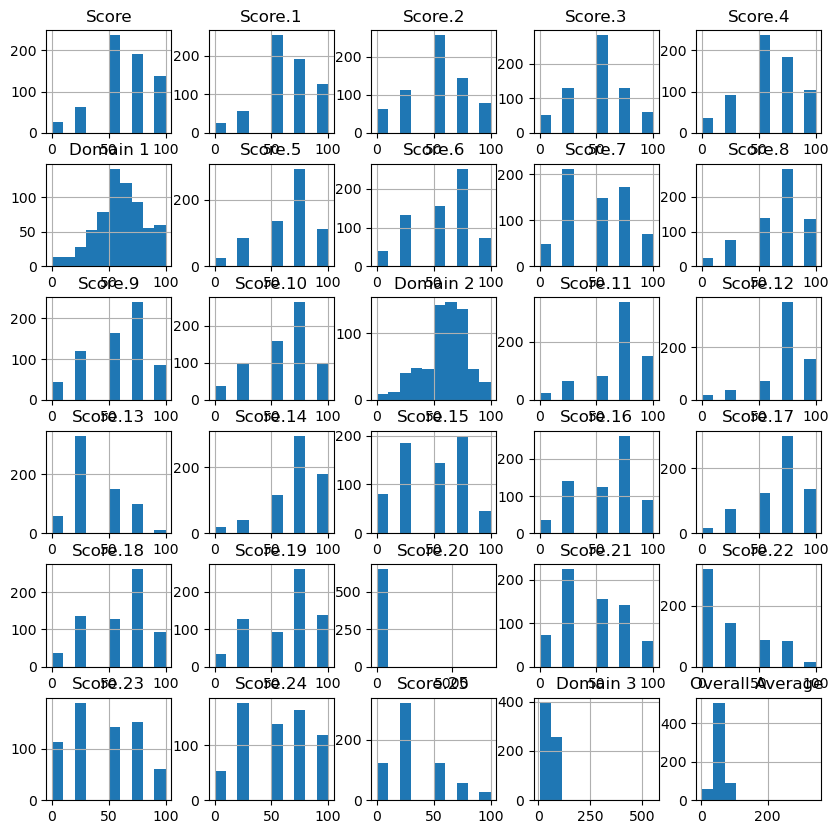

In [5]:
# Plot histograms of the numerical variables
df.hist(figsize=(10,10))
plt.show()

In [6]:
print(df.columns)


Index(['Timestamp', 'Working Station (While treating Covid patients)?', 'Age',
       'Gender', 'Comorbidities?', 'Vaccination ', 'Department', 'Designation',
       'Years of service ?', 'Previously worked in a critical care unit ? ',
       'How many hours of work per week in the current situation?',
       'If you are an ICU nurse, nurse patient ratio ? ',
       'Adequate PPE provided?', 'Was mental health support available?',
       'Received Covid 19 specific training?', 'Tested for Covid 19 ?',
       'If tested , were you positive for Covid 19 ?',
       'Living with family while working with covid 19 patients ?',
       'Personal Burnout [How often are you physically exhausted?]', 'Score',
       'Personal Burnout [How often are you emotionally exhausted?]',
       'Score.1',
       'Personal Burnout [How often do you think: â€œI canâ€™t take it anymore?]',
       'Score.2',
       'Personal Burnout [How often do you feel weak and susceptible to illness?]',
       'Score.3',
 

A few other additional steps I would recommend: 

**1. Data Cleaning - Further examine missing values and decide how to deal with them. For this decide if you want to impute missing values in the "Gender" column with the most common value, or remove the rows with missing values altogether.**

**2. Feature Engineering - Create new features based on domain knowledge or intuition about what factors might contribute to burnout among healthcare personnel. For example, we know that working more shifts or working closer to the source of infection increases risks, stress and burnout in the Healthcare Workers or HCWs.**

**In this regard, create a metric to calculate the ratio of the number of hours worked per week to the number of hours worked per day, or create a binary variable indicating whether the healthcare personnel work was in a COVID-19 ward or not.**

**3. Data Visualization: Create more plots to examine the relationships between variables and identify patterns. For example, generate a scatter plot matrix to see the pairwise relationships between variables, or a count plot to visualize the distribution of categorical variables. To explore the relationships between variables, create scatter plots and correlation matrices. Optionally, create new features from existing variables, such as the length of service in years.**

**5. Standard Tests: Perform statistical tests to determine whether there are significant differences between groups of healthcare personnel based on their demographic and work-related characteristics. For example, perform a t-test to see if there is a significant difference in burnout rates between males and females. Alternatively, use a chi-squared test to see if there is a significant association between burnout rates and whether the healthcare personnel work in a COVID-19 ward or not.**